In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import plotnine as gg
import umap
from sklearn.preprocessing import StandardScaler


## Selecting variables from the collapsed data

In [25]:
# tmp = pd.read_csv(Path("../collated/C-7210-01-CMP-008-gray_collapsed_sampled.csv"))

# ## e
# exclude_var = ['Cells_Correlation_Costes_DNA_Mito',
#  'Cytoplasm_Correlation_Costes_DNA_Mito',
#  'Cytoplasm_Correlation_Costes_DNA_RNA']

# var_list = [col for col in tmp.columns if not "Metadata" in col]
# featlist = [e for e in var_list if e not in exclude_var]


# f = open("featureslist.txt", "w")

# f.writelines(v + '\v' for v in featlist)




'../BR00100032/BR00100032_singlecelldata.csv'

## Paths & reading features list

### Reading Single cell data

In [28]:
foldername = "BR00100037"

csvlist = [os.path.join(Path("../" + foldername, i)) for i in os.listdir(Path("../" + foldername)) if "selected_" in i]

# data = []
# for csv in csvlist:
#     df = pd.read_csv(csv)
#     data.append(df)
    
# data = (pd.concat(data)
#         .drop(columns=['Unnamed: 0'])
#        )
      

prf = []
for csv in csvlist: 
    d = pd.read_csv(csv)
    prf.append(d)
    
data = pd.concat(prf)
    
outpath = os.path.join(Path("../" + foldername, foldername+ "_singlecelldata.csv"))
data.to_csv(outpath)   



In [26]:
outpath = os.path.join(Path("../" + foldername, foldername+ "_singlecelldata.csv"))
data.to_csv(outpath)

## Data_Preprocessing

In [15]:

data_meta = [col for col in data.columns if "Metadata" in col]

featlist = (np.loadtxt(Path("../" + 'metadata' + "/" + 'featureslist.txt'), 
                      dtype=str)
                    .tolist()
           )

plotting_features = ["Nuclei_Location_Center_X", "Nuclei_Location_Center_Y",
 "PathName_OrigDNA", "Metadata_Well", "Metadata_Site","FileName_OrigDNA", 
 "PathName_NucleiOutlines", "FileName_OrigRNA","FileName_OrigMito",
 "FileName_OrigER", "FileName_OrigAGP","FileName_NucleiOutlines", 
 "Cells_Location_Center_X","Cells_Location_Center_Y", 
 "Cells_AreaShape_MajorAxisLength", "Cells_AreaShape_MinorAxisLength"]



newftlist = data_meta + featlist + plotting_features


df_sel = data[data.columns[data.columns.isin(newftlist)]]




metadata_file= "BR00100032_Metadata.csv"

meta = pd.read_csv(Path("../" + foldername + "/" + metadata_file))

selected_wells = (data.Metadata_Well.unique()
                  .tolist()
                 )

selected_wells.remove('I04')


meta_modf = meta.query("Metadata_Well in @ selected_wells")


prf = pd.merge(meta_modf, df_sel, on=["Metadata_Well", "Metadata_Plate"], how="left")

prf['Metadata_Target'].replace(np.nan, 'NA', inplace=True)
prf['Metadata_Annotation'].replace('active ', 'active', inplace=True)

prf['Metadata_Target'].replace(np.nan, 'NA', inplace=True)
prf['Metadata_Annotation'].replace('active ', 'active', inplace=True)





In [16]:
prf.Metadata_compound_name.unique()

array(['DMSO', 'BSJ-04-030', 'BSJ-03-136'], dtype=object)

## data normalization & creating UMAP

In [17]:
def creating_umap_data(prf):
    
    # from sklearn.preprocessing import StandardScaler
    
    
    dmso = prf.query("Metadata_compound_name == 'DMSO'")
    
    dmso_var = dmso[dmso.columns[dmso.columns.isin(featlist)]]
    
    scale = StandardScaler().fit(dmso_var.values)
    
    
    umap_df = []

    for cpd in prf.Metadata_compound_name.unique():
        
        
    
        pf = prf.query("Metadata_compound_name in @cpd")
    
        pf_var = pf[pf.columns[pf.columns.isin(featlist)]]
        pf_meta = pf[pf.columns[~pf.columns.isin(featlist)]]
    
        pf_var.dropna(how='any', inplace=True)
    
        scaled_data = scale.transform(pf_var.values)
    
    
    # ## Umap visualization

        reducer = umap.UMAP()
        embedding = reducer.fit_transform(scaled_data)
        test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

        dm = pf_meta.merge(test, left_index=True, right_index=True, how="left")
        
        umap_df.append(dm)
        
    return pd.concat(umap_df)


umap_df = creating_umap_data(prf)
    
    


    

    
    


/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
umap_df.tail()

,Metadata_broad_sample,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_well_position,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Metadata_QCFlag_Artifact,Metadata_QCFlag_isBlurry,Metadata_QCFlag_isClumped_Saturated,Metadata_QCFlag_isEmpty,Metadata_Row,Metadata_Site,PathName_NucleiOutlines,PathName_OrigDNA,UMAP-1,UMAP-2
59119,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59120,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59121,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59122,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59123,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN


In [29]:
outpath='/Users/habbasi/Documents/Github/broadinstitute/ProteinKinase_NathianelGray/Figures/UMAP/single_celldata/BR00100032/SECRET/'

In [33]:
for i, um in enumerate(umap_df.Metadata_compound_name.unique().tolist()):
    tmp = umap_df.query("Metadata_compound_name in @um")
#     g = gg.ggplot(umap_df, gg.aes(x='UMAP-1', y='UMAP-2', color="Metadata_compound_name")) + \
#     gg.geom_point(size = 0.01) + \
#     gg.theme_classic() + \
#     gg.xlab("UMAP-1") + \
#     gg.xlim(-5, 15) + \
#     gg.ylim(0, 12.5) + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#bababa", '#ca0020', '#0571b0']) + \
#     gg.ylab("UMAP-2") + \
#     gg.labs(title= str(um))
    
#     gg.ggsave(filename=str(um) + '_scdata_dmso.png' , plot = g, path = outpath)
    



   
  
tmp




,Metadata_broad_sample,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_well_position,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Metadata_QCFlag_Artifact,Metadata_QCFlag_isBlurry,Metadata_QCFlag_isClumped_Saturated,Metadata_QCFlag_isEmpty,Metadata_Row,Metadata_Site,PathName_NucleiOutlines,PathName_OrigDNA,UMAP-1,UMAP-2
51440,BRD-U43181200-000-01-8,BR00100032,H05,BR00100032,C-7210-01-CMP-008-gray,A549,H05,NaN,2.5,DMSO,...,1,0,0,0,8,1,/home/ubuntu/local_output/BR00100032-H05-1/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
51441,BRD-U43181200-000-01-8,BR00100032,H05,BR00100032,C-7210-01-CMP-008-gray,A549,H05,NaN,2.5,DMSO,...,1,0,0,0,8,1,/home/ubuntu/local_output/BR00100032-H05-1/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
51442,BRD-U43181200-000-01-8,BR00100032,H05,BR00100032,C-7210-01-CMP-008-gray,A549,H05,NaN,2.5,DMSO,...,1,0,0,0,8,1,/home/ubuntu/local_output/BR00100032-H05-1/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
51443,BRD-U43181200-000-01-8,BR00100032,H05,BR00100032,C-7210-01-CMP-008-gray,A549,H05,NaN,2.5,DMSO,...,1,0,0,0,8,1,/home/ubuntu/local_output/BR00100032-H05-1/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
51444,BRD-U43181200-000-01-8,BR00100032,H05,BR00100032,C-7210-01-CMP-008-gray,A549,H05,NaN,2.5,DMSO,...,1,0,0,0,8,1,/home/ubuntu/local_output/BR00100032-H05-1/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59120,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59121,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN
59122,BRD-U43181200-000-01-8,BR00100032,I20,BR00100032,C-7210-01-CMP-008-gray,A549,I20,NaN,2.5,DMSO,...,0,1,0,0,9,9,/home/ubuntu/local_output/BR00100032-I20-9/out...,/home/ubuntu/bucket/projects/2018_11_20_GeneCp...,NaN,NaN


/Users/habbasi/plotnine/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 56583 rows containing missing values.


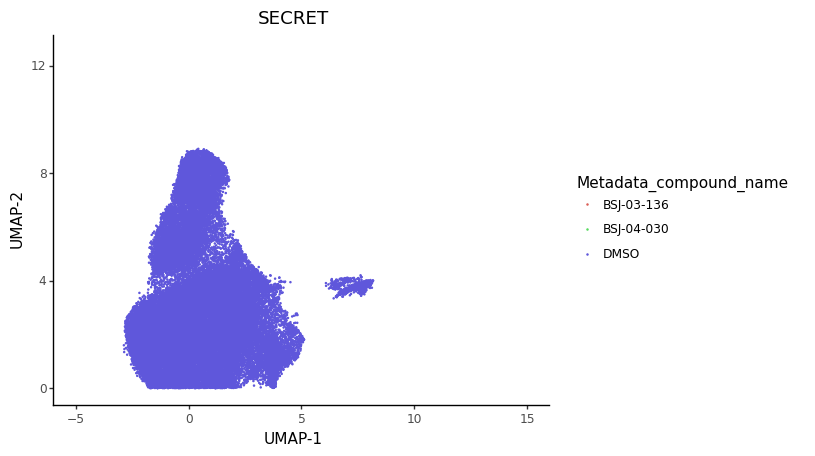

<ggplot: (7034035309)>

In [32]:
g = gg.ggplot(umap_df, gg.aes(x='UMAP-1', y='UMAP-2', color="Metadata_compound_name")) + \
gg.geom_point(size = 0.01) + \
gg.theme_classic() + \
gg.xlab("UMAP-1") + \
gg.xlim(-5, 15) + \
gg.ylim(0, 12.5) + \
gg.ylab("UMAP-2") + \
gg.labs(title= 'SECRET')
 
g   
    

In [82]:
umap_df.to_csv(Path("../" + foldername + "/" + foldername + "_umap_all.csv"))

In [25]:
secret = final.query("Metadata_Target == 'ERK5'")

sc_var = secret[secret.columns[secret.columns.isin(featlist)]].reset_index()

sc_var.dropna(how="any", inplace=True)
#list(sc_var.isnull().sum(axis=0))
sc_var.shape

(108806, 596)

## Excluding I09 Well from single cell data which is C1 positive control and excluded from the data

In [1]:

well='I09'

final = prf.query("Metadata_Well not in @ well")

final_var = final[final.columns[final.columns.isin(featlist)]]
final_var.dropna(inplace=True)
final_var = final_var.values


final_meta = final[final.columns[~final.columns.isin(featlist)]]

dmso = final.query("Metadata_compound_name == 'DMSO'")
dmso_var = dmso[dmso.columns[dmso.columns.isin(featlist)]]


# from sklearn.preprocessing import StandardScaler

# ## data normalization

scale = StandardScaler().fit(dmso_var.values)
scaled_data = scale.transform(final_var)

# ## Umap visualization

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

dm = final_meta.merge(test, left_index=True, right_index=True, how="left")





NameError: name 'prf' is not defined

In [137]:
target_pathway = final.Metadata_Target.unique().tolist()


tmp = final.query("Metadata_Target in @target_pathway[2]")
tmp_var = tmp[tmp.columns[tmp.columns.isin(featlist)]]
tmp_meta = tmp[tmp.columns[~tmp.columns.isin(featlist)]]

tmp_var.dropna(inplace=True)
# indices_to_keep = ~tmp_var.isin([np.nan, np.inf, -np.inf]).any(1)
# test = tmp_var[indices_to_keep].astype(np.float64)


tmp_scaled = scale.transform(tmp_var.values)

reducer = umap.UMAP()
embedding = reducer.fit_transform(tmp_scaled)


#tmp_var = tmp_var.dropna()


/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
embedding

array([[-3.6189985,  5.4608865],
       [-3.3242378,  4.91651  ],
       [-3.812752 ,  5.3291707],
       ...,
       [-3.5902803,  3.9769733],
       [-2.4637766,  6.456161 ],
       [-1.6042081,  4.872947 ]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler

## data normalization

scale = StandardScaler().fit(dmso_var.values)
scaled_data = scale.transform(final_var)

## Umap visualization

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

dm = final_meta.merge(test, left_index=True, right_index=True, how="left")


In [ ]:
dm.head()

In [ ]:
top_dir = os.path.dirname(os.getcwd())
outpath = os.path.join(top_dir, "Figures")
outpath

,"#2b83ba","#bababa"

In [ ]:
dm.Metadata_compound_name.unique()

In [ ]:
dm.Metadata_compound_name.unique()



tmp2 = dm.query("Metadata_compound_name == 'DMSO'")


g = gg.ggplot(tmp2, gg.aes(x='UMAP-1', y='UMAP-2', color="Metadata_compound_name")) + \
    gg.geom_point(size = 0.01) + \
    gg.theme_classic() + \
    gg.xlab("UMAP-1") + \
    gg.xlim(-5, 15) + \
    gg.ylim(0, 12.5) + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#bababa"]) + \
    gg.ylab("UMAP-2")


    
  
 
gg.ggsave(filename='SECRET_scdata_dmso.png' , plot = g, path = outpath)


g

In [ ]:
list(tmp2.Metadata_FieldID)

In [ ]:
list(tmp2.columns)

In [ ]:
def show(p):
    output_notebook()
    bshow(p)

In [ ]:
p = figure(height=200, sizing_mode ="scale_width")
p.circle(tmp2['UMAP-1'], tmp2['UMAP-2'], radius=0.001)

p.title.text = 'UMAP of BSJ-03-136'
# p.background_fill_color = 'beige'
# p.outline_linewidth = 7
# p.outline_line_alpha = 0.3
# p.outline_line_color = "navy"
show(p)

In [ ]:
tmp2.head()

In [ ]:

import plotly.express as px

fig = px.scatter(data, x="UMAP-1", y="UMAP-2", color="Metadata_datatype",
                 #size='petal_length',
                 hover_data=['Metadata_broad_sample'], title='Uniform Manifold Approximation and Projection for Dimension Reduction')
fig.update_traces(marker=dict(size=2,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')
                             ),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import re


def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)
    
    ch1 = [s for s in image_data if "ch1" in s]
    ch2 = [s for s in image_data if "ch2" in s]
    ch3 = [s for s in image_data if "ch3" in s]
    ch4 = [s for s in image_data if "ch4" in s]
    ch5 = [s for s in image_data if "ch5" in s]
    ch6 = [s for s in image_data if "ch6" in s]



    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in ch1]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path, ch1, ch2, ch3, ch4, ch5, ch6, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', 'ch1', 'ch2', 'ch3','ch4','ch5','ch6',
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath)


df.head()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import re
import skimage.io


def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)


    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in image_data]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path,image_data, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', "filename", 
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath)


df.Metadata_channel.unique()

In [ ]:
well = "P20"
field ="06"
ch = str(1)

#img = df.query("Metadata_Well in @ well and Metadata_Field in @ field and Metadata_channel in @ ch")
img = sorted(df.query("Metadata_Well in @ well and Metadata_Field in @ field")["filename"].tolist())


input_dir = "/Users/habbasi/Desktop/images"


image_data = []
for i, each in enumerate(img):
    fullpath = os.path.join(input_dir, each)
    imgs = skimage.io.imread(fullpath)
    image_data.append(imgs)

    
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 6),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_data):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


In [ ]:
# from ipywidgets import Image


# with open(imgpath, "rb") as f:   ## read bytes in ipywidegt
#     b = f.read()
    
# Image(value=b)

In [ ]:
list(tmp2.columns)

In [ ]:
g = gg.ggplot(tmp2, gg.aes(x='UMAP-1', y='UMAP-2', color="Metadata_compound_name")) + \
    gg.geom_point(size = 0.5) + \
    gg.theme_classic() + \
    gg.xlab("UMAP-1") + \
    gg.xlim(-5, 15) + \
    gg.ylim(0, 12.5) + \
    gg.ylab("UMAP-2")


    
  
 
#ggsave(filename='Welch_test_SECRET_95percentile_' + str(c) + ".png", plot = g, path = outpath)


g